In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cereals = pd.read_csv('cereals.csv', na_values='-1')
cereals = cereals.set_index('name')
cereals = pd.get_dummies(cereals, columns=['mfr', 'type'])

In [3]:
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10,5,6,280,25,3,...,0.33,0,0,0,1,0,0,0,1,0
100%_Natural_Bran,120,3,5,15,2,8,8,135,0,3,...,1.00,0,0,0,0,0,1,0,1,0
All-Bran,70,4,1,260,9,7,5,320,25,3,...,0.33,0,0,1,0,0,0,0,1,0
All-Bran_with_Extra_Fiber,50,4,0,140,14,8,0,330,25,3,...,0.50,0,0,1,0,0,0,0,1,0
Almond_Delight,110,2,2,200,1,14,8,NaN,25,3,...,0.75,0,0,0,0,0,0,1,1,0


In [4]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [5]:
Tcereals = pd.DataFrame(imp.fit_transform(cereals))

In [6]:
Tcereals = Tcereals.set_index(cereals.index)
Tcereals.columns = cereals.columns

In [7]:
Tcereals

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,...,cups,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
name,,,,,,,,,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.000000,6.000000,280.000000,25,3,...,0.33,0,0,0,1,0,0,0,1,0
100%_Natural_Bran,120,3,5,15,2.0,8.000000,8.000000,135.000000,0,3,...,1.00,0,0,0,0,0,1,0,1,0
All-Bran,70,4,1,260,9.0,7.000000,5.000000,320.000000,25,3,...,0.33,0,0,1,0,0,0,0,1,0
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.000000,0.000000,330.000000,25,3,...,0.50,0,0,1,0,0,0,0,1,0
Almond_Delight,110,2,2,200,1.0,14.000000,8.000000,98.666667,25,3,...,0.75,0,0,0,0,0,0,1,1,0
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.500000,10.000000,70.000000,25,1,...,0.75,0,1,0,0,0,0,0,1,0
Apple_Jacks,110,2,0,125,1.0,11.000000,14.000000,30.000000,25,2,...,1.00,0,0,1,0,0,0,0,1,0
Basic_4,130,3,2,210,2.0,18.000000,8.000000,100.000000,25,3,...,0.75,0,1,0,0,0,0,0,1,0
Bran_Chex,90,2,1,200,4.0,15.000000,6.000000,125.000000,25,1,...,0.67,0,0,0,0,0,0,1,1,0


In [8]:
scale = StandardScaler()
T_scaled_cereals = scale.fit_transform(Tcereals)

In [9]:
KM = []
for i in range(3, 10):
    KM.append(KMeans(n_clusters=i))

In [10]:
KM = list(map(lambda x: x.fit_predict(T_scaled_cereals), KM))

In [11]:
KM_vals = []
for item in KM:
    unique = {num for num in item}
    items = {}
    
    for num in unique:
        items[num] = []
    
        for idx in range(len(item)):
            if item[idx] == num:
                items[num].append(idx)
                
    KM_vals.append(items)

In [12]:
KM_names = [{pt: list(map(lambda x: cereals.index[x], idxs)) for pt, idxs in item.items()} for item in KM_vals]

In [13]:
KM_names

[{0: ['100%_Bran',
   '100%_Natural_Bran',
   'All-Bran',
   'All-Bran_with_Extra_Fiber',
   'Bran_Flakes',
   "Cracklin'_Oat_Bran",
   'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
   'Grape_Nuts_Flakes',
   'Grape-Nuts',
   'Great_Grains_Pecan',
   'Life',
   'Post_Nat._Raisin_Bran',
   'Puffed_Rice',
   'Puffed_Wheat',
   'Quaker_Oat_Squares',
   'Raisin_Nut_Bran',
   'Raisin_Squares'],
  1: ['Almond_Delight',
   'Apple_Cinnamon_Cheerios',
   'Apple_Jacks',
   'Basic_4',
   'Bran_Chex',
   "Cap'n'Crunch",
   'Cheerios',
   'Cinnamon_Toast_Crunch',
   'Clusters',
   'Cocoa_Puffs',
   'Corn_Chex',
   'Corn_Flakes',
   'Corn_Pops',
   'Count_Chocula',
   'Crispix',
   'Crispy_Wheat_&_Raisins',
   'Double_Chex',
   'Froot_Loops',
   'Frosted_Flakes',
   'Frosted_Mini-Wheats',
   'Fruitful_Bran',
   'Fruity_Pebbles',
   'Golden_Crisp',
   'Golden_Grahams',
   'Honey_Graham_Ohs',
   'Honey_Nut_Cheerios',
   'Honey-comb',
   'Just_Right_Crunchy__Nuggets',
   'Just_Right_Fruit_&_Nut',
   'Kix',

In [16]:
def graph_col(idx, column):
    x = []
    y = []
    for item in KM_names[idx].keys():
        for val in KM_names[idx][item]:
            x.append(item)
            y.append(column[val]) # example column:  cereals.sugars

    return plt.scatter(x=x, y=y)
    

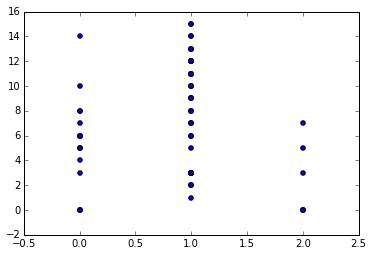

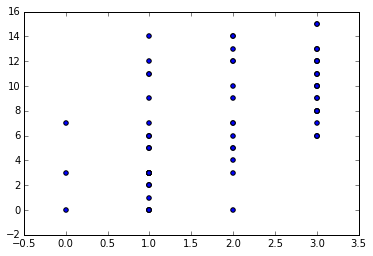

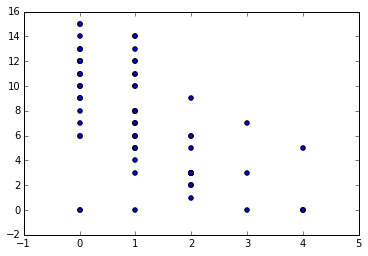

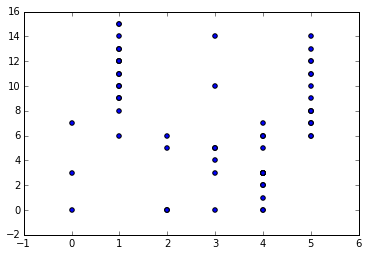

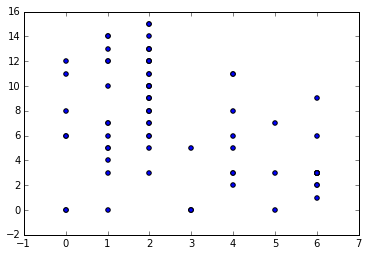

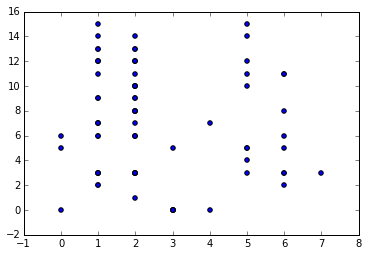

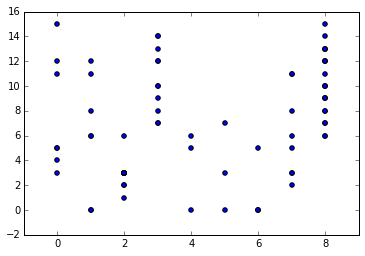

In [22]:
for idx in range(len(KM_names)):
    graph_col(idx, Tcereals.sugars)
    plt.show()

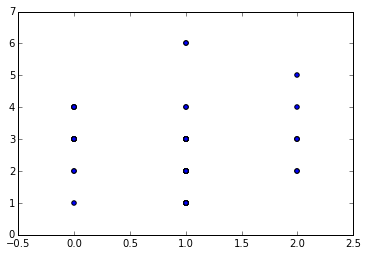

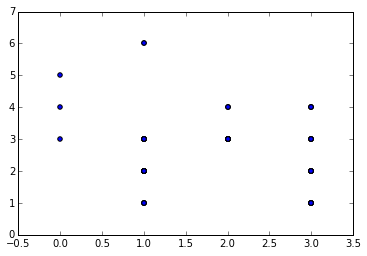

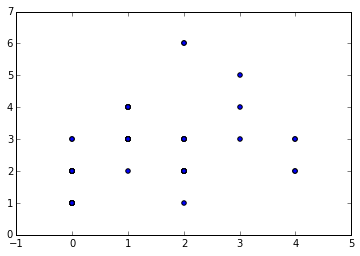

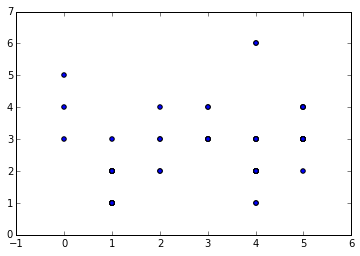

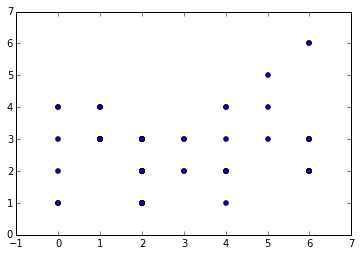

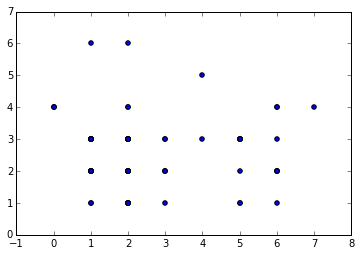

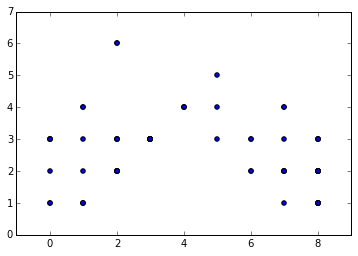

In [23]:
for idx in range(len(KM_names)):
    graph_col(idx, Tcereals.protein)
    plt.show()

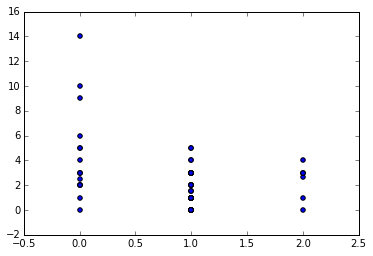

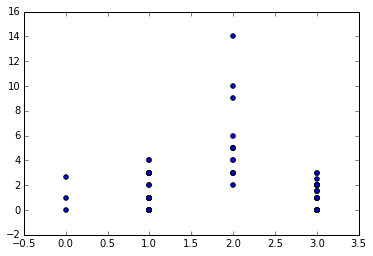

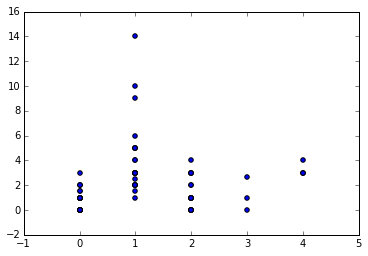

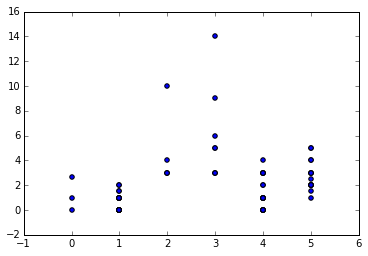

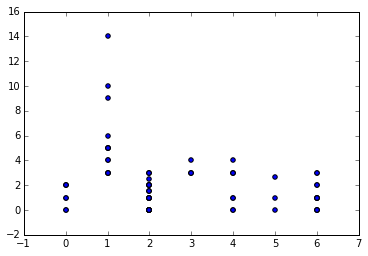

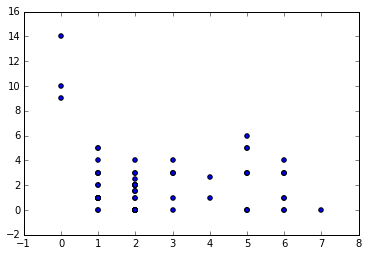

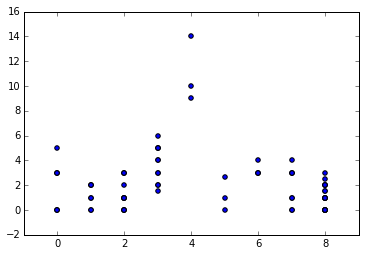

In [24]:
for idx in range(len(KM_names)):
    graph_col(idx, Tcereals.fiber)
    plt.show()

# 5 groups is the largest number that seems to yield a consistency across sugars, proteins, fiber

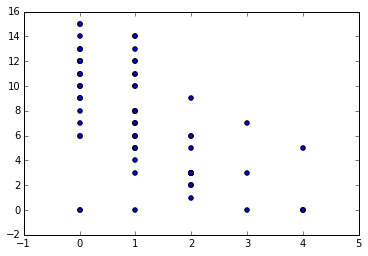

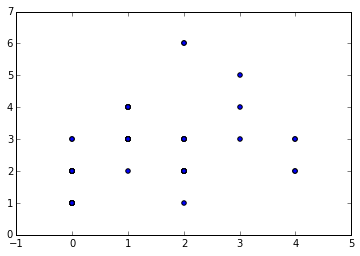

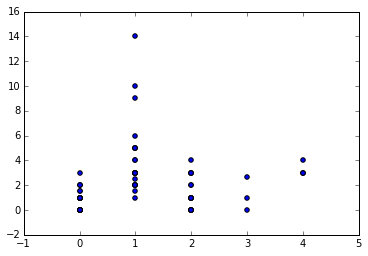

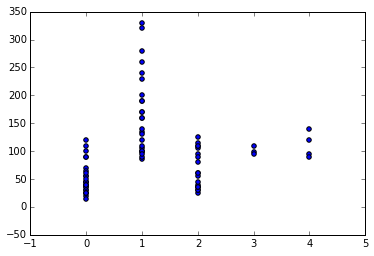

In [30]:
graph_col(2, Tcereals.sugars)
plt.show()
graph_col(2, Tcereals.protein)
plt.show()
graph_col(2, Tcereals.fiber)
plt.show()
graph_col(2, Tcereals.potass)
plt.show()

In [32]:
KM_names[2]

{0: ['Apple_Cinnamon_Cheerios',
  'Apple_Jacks',
  "Cap'n'Crunch",
  'Cinnamon_Toast_Crunch',
  'Cocoa_Puffs',
  'Corn_Pops',
  'Count_Chocula',
  'Crispy_Wheat_&_Raisins',
  'Froot_Loops',
  'Frosted_Flakes',
  'Frosted_Mini-Wheats',
  'Fruity_Pebbles',
  'Golden_Crisp',
  'Golden_Grahams',
  'Honey_Graham_Ohs',
  'Honey_Nut_Cheerios',
  'Honey-comb',
  'Lucky_Charms',
  'Multi-Grain_Cheerios',
  'Nut&Honey_Crunch',
  'Puffed_Rice',
  'Puffed_Wheat',
  'Raisin_Squares',
  'Smacks',
  'Trix',
  'Wheaties_Honey_Gold'],
 1: ['100%_Bran',
  '100%_Natural_Bran',
  'All-Bran',
  'All-Bran_with_Extra_Fiber',
  'Almond_Delight',
  'Basic_4',
  'Bran_Flakes',
  'Clusters',
  "Cracklin'_Oat_Bran",
  'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
  'Fruitful_Bran',
  'Grape_Nuts_Flakes',
  'Grape-Nuts',
  'Great_Grains_Pecan',
  'Life',
  'Muesli_Raisins,_Dates,_&_Almonds',
  'Muesli_Raisins,_Peaches,_&_Pecans',
  'Mueslix_Crispy_Blend',
  'Nutri-Grain_Almond-Raisin',
  'Oatmeal_Raisin_Crisp',
  'Pos

##1 -> High sugar, low protein, low fiber, low potassium = terrible cereals
##2 -> 2nd in sugar, more protein, wide/high fiber range, High potassium = nuts and brans
##3 -> 3rd in sugar, lowish protein, middle fiber, low potassium = corn/rice/bran
##4 -> low sugar, High protein, low fiber, high potassium = meat cereal = hot cereal
##5 -> lowest sugar, middle protein, high fiber, high potassium = shredded wheats